<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura Data preprocessing</center>

# Challenge S6: Análisis de Tweets

## Objetivo

El objetivo de este challenge es a construir un visualizador de tweets con un dataset que contiene:

* Tweets con contenido positivo
* Tweets con contenido negativo

Para ello vamos a utilizar un dataset, o corpus, de tweets preclasificados. Constuiremos nuestro WordCloud con estos datos preprocesando los tweets previamente.

## Configuración del entorno

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.probability import FreqDist

## Carga de datos

En este caso los tweets preclasificados se encuentran en un fichero txt (`twitter_training.txt`) que contiene una línea por cada tweet y tiene la siguiente estructura `(0|1)<TABULADOR>tweet`:

In [2]:
tweets_positivos = []
tweets_negativos = []

with open('twitter_training.txt', 'r', encoding='utf-8') as file:
    for line in file:
        trozos = line.split('\t')
        
        if trozos[0] == '0':
            # Negativos
            tweets_negativos.append(trozos[1].lower())
        elif trozos[0] == '1':
            # Positivos
            tweets_positivos.append(trozos[1].lower())

In [3]:
print(tweets_positivos[0:5])

['the da vinci code book is just awesome.\n', "this was the first clive cussler i've ever read, but even books like relic, and da vinci code were more plausible than this.\n", 'i liked the da vinci code a lot.\n', 'i liked the da vinci code a lot.\n', "i liked the da vinci code but it ultimatly didn't seem to hold it's own.\n"]


In [4]:
print(tweets_negativos[0:5])

['da vinci code was a terrible movie.\n', 'then again, the da vinci code is super shitty movie, and it made like 700 million.\n', 'the da vinci code comes out tomorrow, which sucks.\n', 'i thought the da vinci code movie was really boring.\n', "god, yahoo games has this truly-awful looking da vinci code-themed skin on it's chessboard right now.\n"]


In [5]:
tweets_positivos

['the da vinci code book is just awesome.\n',
 "this was the first clive cussler i've ever read, but even books like relic, and da vinci code were more plausible than this.\n",
 'i liked the da vinci code a lot.\n',
 'i liked the da vinci code a lot.\n',
 "i liked the da vinci code but it ultimatly didn't seem to hold it's own.\n",
 "that's not even an exaggeration ) and at midnight we went to wal-mart to buy the da vinci code, which is amazing of course.\n",
 'i loved the da vinci code, but now i want something better and different!..\n',
 'i thought da vinci code was great, same with kite runner.\n',
 'the da vinci code is actually a good movie...\n',
 'i thought the da vinci code was a pretty good book.\n',
 'the da vinci code is one of the most beautiful movies ive ever seen.\n',
 'the da vinci code is an * amazing * book, do not get me wrong.\n',
 'then i turn on the light and the radio and enjoy my da vinci code.\n',
 'the da vinci code was really good.\n',
 'i love da vinci code

## Limpieza de tweets
La primera función a implementar una función que nos filtre los tweets completos sin signos de puntuación:

In [6]:
def filtrar_tweet(tweet):
    '''
    Filtra un tweet devolviendo un tweet "limpio"
    '''
    separadores = [',','=', '.', ';', ':', '?', '¿', '!', '¡','-', '\n', "'",'``','(',')']
    for c in separadores:
        if c in separadores:
            tweet = tweet.replace(c, '')
    return tweet

In [7]:
tweets_positivos_filtrados = [filtrar_tweet(x) for x in tweets_positivos]
print(tweets_positivos_filtrados[0:5])

['the da vinci code book is just awesome', 'this was the first clive cussler ive ever read but even books like relic and da vinci code were more plausible than this', 'i liked the da vinci code a lot', 'i liked the da vinci code a lot', 'i liked the da vinci code but it ultimatly didnt seem to hold its own']


In [8]:
tweets_negativos_filtrados = [filtrar_tweet(x) for x in tweets_negativos]
print(tweets_negativos_filtrados[0:5])

['da vinci code was a terrible movie', 'then again the da vinci code is super shitty movie and it made like 700 million', 'the da vinci code comes out tomorrow which sucks', 'i thought the da vinci code movie was really boring', 'god yahoo games has this trulyawful looking da vinci codethemed skin on its chessboard right now']


## Obtención de palabras
El siguiente paso de nuestro pipeline es convertir los tweets en palabras:

In [9]:
def obtener_palabras(tweet):
    '''
    Realiza la separación en palabras de un tweet devolviendo una lista de palabras.
    '''
    palabras = []
    palabras = word_tokenize(tweet)

    return palabras

In [10]:
palabras_positivas = []
for t in tweets_positivos_filtrados:
    palabras_positivas.extend(obtener_palabras(t))
    
print("palabras_positivas: " + str(len(palabras_positivas)))
print(palabras_positivas[0:50])

palabras_positivas: 42029
['the', 'da', 'vinci', 'code', 'book', 'is', 'just', 'awesome', 'this', 'was', 'the', 'first', 'clive', 'cussler', 'ive', 'ever', 'read', 'but', 'even', 'books', 'like', 'relic', 'and', 'da', 'vinci', 'code', 'were', 'more', 'plausible', 'than', 'this', 'i', 'liked', 'the', 'da', 'vinci', 'code', 'a', 'lot', 'i', 'liked', 'the', 'da', 'vinci', 'code', 'a', 'lot', 'i', 'liked', 'the']


In [11]:
palabras_negativas = []
for t in tweets_negativos_filtrados:
    palabras_negativas.extend(obtener_palabras(t))
    
print("palabras_negativas: " + str(len(palabras_negativas)))
print(palabras_negativas[0:50])

palabras_negativas: 34862
['da', 'vinci', 'code', 'was', 'a', 'terrible', 'movie', 'then', 'again', 'the', 'da', 'vinci', 'code', 'is', 'super', 'shitty', 'movie', 'and', 'it', 'made', 'like', '700', 'million', 'the', 'da', 'vinci', 'code', 'comes', 'out', 'tomorrow', 'which', 'sucks', 'i', 'thought', 'the', 'da', 'vinci', 'code', 'movie', 'was', 'really', 'boring', 'god', 'yahoo', 'games', 'has', 'this', 'trulyawful', 'looking', 'da']


## Filtrar palabras
Una vez obtenidas las palabras debemos filtrar todas las palabras que no aporte información relevante al resultado. Acuérdate de filtrar también los signos de puntuación que puedan haber:

In [12]:
def filtrar_palabras(palabras):
    ''' 
    Elimina de la lista de entrada las palabras no deseadas
    Devuelve una lista de palabras filtradas.
    '''
    out = []
    x = stopwords.words('english')
    for palabra in palabras:
        if palabra.lower() in x:
            pass
        else:
            out.append(palabra)

    return out

In [13]:
palabras_positivas_filtradas = filtrar_palabras(palabras_positivas)

print("palabras_positivas_filtradas: " + str(len(palabras_positivas_filtradas)))
print(palabras_positivas_filtradas[0:50])

palabras_positivas_filtradas: 26320
['da', 'vinci', 'code', 'book', 'awesome', 'first', 'clive', 'cussler', 'ive', 'ever', 'read', 'even', 'books', 'like', 'relic', 'da', 'vinci', 'code', 'plausible', 'liked', 'da', 'vinci', 'code', 'lot', 'liked', 'da', 'vinci', 'code', 'lot', 'liked', 'da', 'vinci', 'code', 'ultimatly', 'didnt', 'seem', 'hold', 'thats', 'even', 'exaggeration', 'midnight', 'went', 'walmart', 'buy', 'da', 'vinci', 'code', 'amazing', 'course', 'loved']


In [14]:
palabras_negativas_filtradas = filtrar_palabras(palabras_negativas)

print("palabras_negativas_filtradas: " + str(len(palabras_negativas_filtradas)))
print(palabras_negativas_filtradas[0:50])

palabras_negativas_filtradas: 22145
['da', 'vinci', 'code', 'terrible', 'movie', 'da', 'vinci', 'code', 'super', 'shitty', 'movie', 'made', 'like', '700', 'million', 'da', 'vinci', 'code', 'comes', 'tomorrow', 'sucks', 'thought', 'da', 'vinci', 'code', 'movie', 'really', 'boring', 'god', 'yahoo', 'games', 'trulyawful', 'looking', 'da', 'vinci', 'codethemed', 'skin', 'chessboard', 'right', 'da', 'vinci', 'code', 'suck', 'betterwe', 'know', 'da', 'vinci', 'code', 'bogus', 'inaccurate']


## Wordclouds

Vamos a dar un primer vistazo a los resultados. Construye un wordcloud para sentimiento positivo, uno para sentimiento negativo y otro que combine ambos tipos de palabras. 

Recuerda que wordcloud espera que le pases las palabras separadas por espacios en una misma cadena. Para ello, ayúdate de `join`: `palabras_positivas_juntas = ' '.join(palabras_positivas)`

### Wordcloud de sentimientos positivos

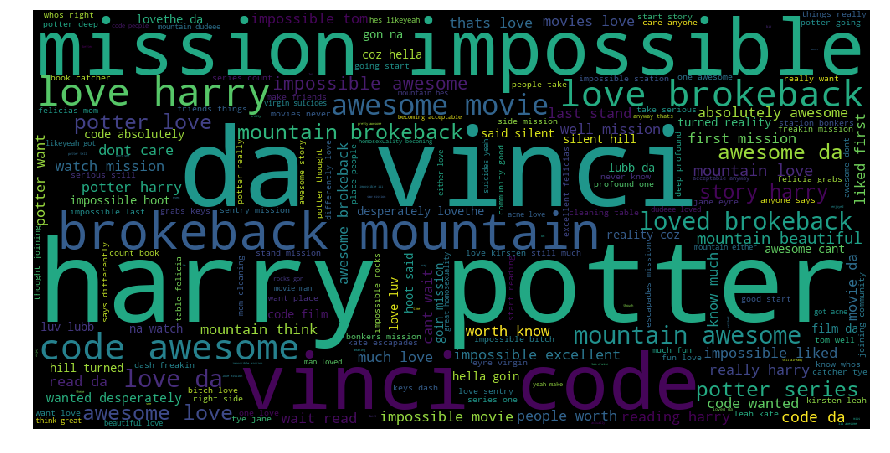

In [15]:
# IMPLEMENTA AQUÍ TU CÓDIGO
palabras_positivas_juntas = ' '.join(palabras_positivas_filtradas)
wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.5).generate(palabras_positivas_juntas)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Wordcloud de sentimientos negativos

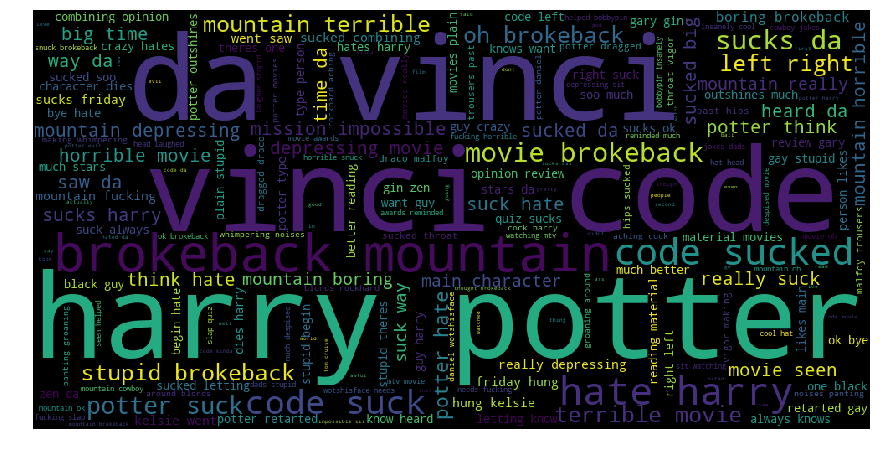

In [16]:
# IMPLEMENTA AQUÍ TU CÓDIGO
palabras_negativas_juntas = ' '.join(palabras_negativas_filtradas)
wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.5).generate(palabras_negativas_juntas)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Wordcloud de ambos sentimientos

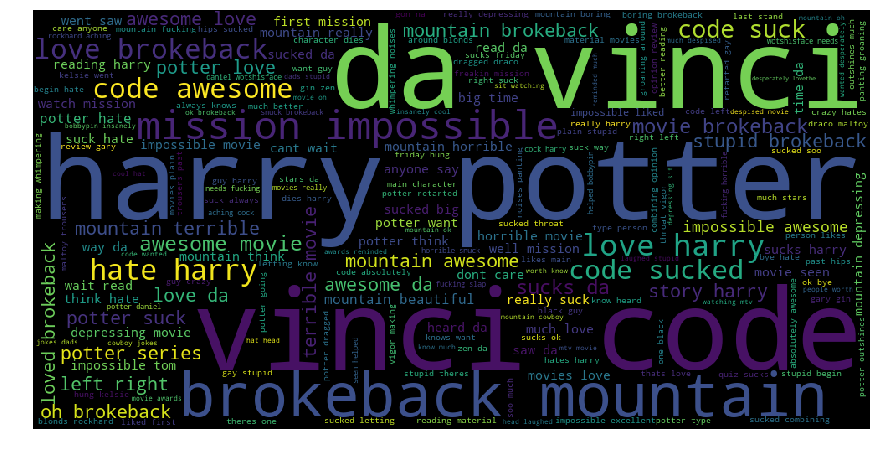

In [17]:
# IMPLEMENTA AQUÍ TU CÓDIGO
sentimientos = palabras_negativas_filtradas + palabras_positivas_filtradas
x = ' '.join(sentimientos)

wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.5).generate(x)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

* ¿Qué te parecen los resultados?
* ¿Qué crees que se podría mejorar?

los resultados son interesantes al observar el output que corresponde con cada sentimiento. 

Creo que se podría incluir como mejora el limitar o agrupar wordclouds de manera que se detecte varias palabras como un significado parecido y se agrupe (por ejemplo, agrupar palarbas positivas y negativas que contengan "Harry Potter"). 

De esta forma se tendría un output más variado de los distintos significados.

## Análisis de frecuencias de tweets negativos y positivos
A partir de las palabras filtradas queremos el conjunto de palabras que nos muestre cuales son las palabras más probables en cada categoría (tweet positivo o negativo).

In [18]:
def calcula_palabras_mas_probables(palabras, n):
    '''
    Devuelve un conjunto con las n palabras más probables
    '''
    conjunto = set()
    
    fdist = FreqDist(palabras)
    lista = fdist.most_common(n)
    
    for elem in lista:
        conjunto.add(elem[0])

    return conjunto

In [19]:
conjunto_positivas = calcula_palabras_mas_probables(palabras_positivas_filtradas, 150)  

print("conjunto_positivas: " + str(len(conjunto_positivas)))
print(conjunto_positivas)

conjunto_positivas: 150
{'lovethe', 'silent', 'deep', 'worth', 'escapades', 'reality', 'profound', 'much', 'stand', 'coz', 'one', 'felicia', 'table', 'see', 'good', 'grabs', 'think', 'amazing', 'dudeee', 'go', 'suicides', 'also', 'beautiful', 'well', 'love', 'last', 'like', 'homosexuality', 'acceptable', 'becoming', 'cleaning', 'gon', 'pretty', 'iii', '2', 'hella', 'got', 'first', 'count', '``', 'mom', 'though', 'kirsten', 'joining', 'likeyeah', 'want', 'already', 'im', 'impossible', 'serious', 'start', 'vinci', 'know', 'better', 'books', 'rocks', 'sentry', 'bitch', 'lot', 'best', 'movie', 'story', 'says', '<', 'kate', '/', 'na', 'big', 'awesome', 'would', 'turned', 'dash', 'friends', 'make', 'code', 'movies', 'yeah', 'care', 'tell', 'bonkers', 'really', 'anyone', 'take', 'brokeback', 'film', 'read', 'place', 'hoot', 'way', 'dont', 'leah', 'keys', 'right', 'mountain', 'either', 'even', 'liked', 'going', 'series', 'wanted', 'reading', 'desperately', 'man', 'hes', 'freakin', 'say', 'side

In [20]:
conjunto_negativas = calcula_palabras_mas_probables(palabras_negativas_filtradas, 150)    
    
print("conjunto_negativas: " + str(len(conjunto_negativas)))
print(conjunto_negativas)

conjunto_negativas: 150
{'guy', 'outshines', 'boring', 'cruise', 'much', 'sit', 'left', 'oh', 'one', 'around', 'rockhard', 'see', 'main', 'good', 'noises', 'think', 'awards', 'zen', 'go', '25', 'also', 'insanely', 'like', 'vigor', 'terrible', 'sucked', 'gin', 'material', 'pretty', 'iii', '2', 'cowboy', 'knows', 'bye', 'character', 'snuck', '``', 'though', 'thought', 'want', 'combining', 'hat', 'im', 'helped', 'hated', 'impossible', 'stupid', 'vinci', 'know', 'time', 'better', 'ok', 'kelsie', 'soo', 'trousers', 'watching', 'likes', 'movie', 'black', 'past', 'quiz', '/', 'big', 'groaning', 'jokes', '’', 'would', 'gay', 'panting', 'letting', 'wotshisface', 'dads', 'always', 'code', 'movies', 'retarted', 'really', 'throat', 'theres', 'brokeback', 'read', 'way', 'kinda', 'dont', 'despised', 'hates', 'stars', 'right', 'mountain', 'dragged', 'dies', 'bobbypin', 'even', 'b', 'needs', 'going', 'cool', 'reading', 'hung', 'malfoy', 'type', 'suck', 'hips', 'aching', 'say', 'horrible', 'saw', 'whim

### ¿Se te ocurre como mejorarlo?
Como ves existen muchas palabras parecidas, o directamente las mismas, ¿se te ocurre cómo podríamos mejorarlo?. Por ejemplo, podríamos eliminar esas palabras comunes de ambos conjuntos, ya que no aportan nada.

In [21]:
comunes = list(set(conjunto_negativas).intersection(conjunto_positivas))
print(comunes)

['though', 'brokeback', 'things', 'want', 'much', 'read', 'way', 'one', 'dont', 'im', 'impossible', 'see', 'still', 'right', 'good', 'mountain', 'harry', 'vinci', 'think', 'know', 'even', 'better', 'really', 'go', '3', 'said', 'also', 'going', 'reading', 'book', 'movie', 'like', '/', 'big', 'say', 'would', 'pretty', 'iii', 'saw', '2', 'potter', 'code', 'movies', 'people', 'da', 'mission', 'watch', 'went', '``', 'thought']


Una vez tenemos las palabras comunes, podemos aplicarlo a los conjuntos tal y como hemos hecho con el resto de transformaciones.

In [22]:
conjunto_positivas

{'*',
 '/',
 '2',
 '3',
 '<',
 '``',
 'absolutely',
 'acceptable',
 'acne',
 'already',
 'also',
 'amazing',
 'anyone',
 'anyway',
 'awesome',
 'beautiful',
 'becoming',
 'best',
 'better',
 'big',
 'bitch',
 'bonkers',
 'book',
 'books',
 'brokeback',
 'cant',
 'care',
 'catcher',
 'cleaning',
 'code',
 'community',
 'count',
 'coz',
 'da',
 'dash',
 'deep',
 'desperately',
 'differently',
 'dont',
 'dudeee',
 'either',
 'escapades',
 'even',
 'excellent',
 'eyre',
 'felicia',
 'felicias',
 'film',
 'first',
 'freakin',
 'friends',
 'fun',
 'get',
 'go',
 'goin',
 'going',
 'gon',
 'good',
 'got',
 'grabs',
 'great',
 'harry',
 'hella',
 'hes',
 'hill',
 'homosexuality',
 'hoot',
 'iii',
 'im',
 'impossible',
 'jane',
 'joining',
 'kate',
 'keys',
 'kirsten',
 'know',
 'last',
 'leah',
 'like',
 'liked',
 'likeyeah',
 'lot',
 'love',
 'loved',
 'lovethe',
 'lubb',
 'luv',
 'make',
 'man',
 'miss',
 'mission',
 'mom',
 'mountain',
 'movie',
 'movies',
 'much',
 'na',
 'never',
 'one',


In [23]:
def quitar_comunes(words, comunes):
    out = []
    words = list(words)
    for value in words:
        if (value in comunes):
            pass
        else:
            out.append(value)
    return out

In [24]:
conjunto_positivas_filtradas = quitar_comunes(conjunto_positivas, comunes)
print("conjunto_positivas_filtradas: ", str(conjunto_positivas_filtradas))

conjunto_positivas_filtradas:  ['lovethe', 'silent', 'deep', 'worth', 'escapades', 'reality', 'profound', 'stand', 'coz', 'felicia', 'table', 'grabs', 'amazing', 'dudeee', 'suicides', 'beautiful', 'well', 'love', 'last', 'homosexuality', 'acceptable', 'becoming', 'cleaning', 'gon', 'hella', 'got', 'first', 'count', 'mom', 'kirsten', 'joining', 'likeyeah', 'already', 'serious', 'start', 'books', 'rocks', 'sentry', 'bitch', 'lot', 'best', 'story', 'says', '<', 'kate', 'na', 'awesome', 'turned', 'dash', 'friends', 'make', 'yeah', 'care', 'tell', 'bonkers', 'anyone', 'take', 'film', 'place', 'hoot', 'leah', 'keys', 'either', 'liked', 'series', 'wanted', 'desperately', 'man', 'hes', 'freakin', 'side', 'eyre', 'great', '*', 'jane', 'community', 'felicias', 'hill', 'tom', 'anyway', 'lubb', 'luv', 'get', 'station', 'excellent', 'virgin', 'catcher', 'whos', 'differently', 'fun', 'tye', 'thats', 'never', 'loved', 'acne', 'wait', 'goin', 'miss', 'cant', 'absolutely']


In [25]:
conjunto_negativas_filtradas = quitar_comunes(conjunto_negativas, comunes)
print("conjunto_negativas_filtradas: ", str(conjunto_negativas_filtradas))

conjunto_negativas_filtradas:  ['guy', 'outshines', 'boring', 'cruise', 'sit', 'left', 'oh', 'around', 'rockhard', 'main', 'noises', 'awards', 'zen', '25', 'insanely', 'vigor', 'terrible', 'sucked', 'gin', 'material', 'cowboy', 'knows', 'bye', 'character', 'snuck', 'combining', 'hat', 'helped', 'hated', 'stupid', 'time', 'ok', 'kelsie', 'soo', 'trousers', 'watching', 'likes', 'black', 'past', 'quiz', 'groaning', 'jokes', '’', 'gay', 'panting', 'letting', 'wotshisface', 'dads', 'always', 'retarted', 'throat', 'theres', 'kinda', 'despised', 'hates', 'stars', 'dragged', 'dies', 'bobbypin', 'b', 'needs', 'cool', 'hung', 'malfoy', 'type', 'suck', 'hips', 'aching', 'horrible', 'whimpering', 'laughed', 'reminded', 'ass', 'hate', 'fucking', 'making', 'awful', 'begin', 'review', 'draco', 'slap', 'blonds', 'gary', 'ever', 'head', 'opinion', 'daniel', 'sucks', 'cock', 'friday', 'person', 'plain', 'heard', 'balls', 'depressing', 'may', 'seen', 'crazy', 'evil', 'mtv']


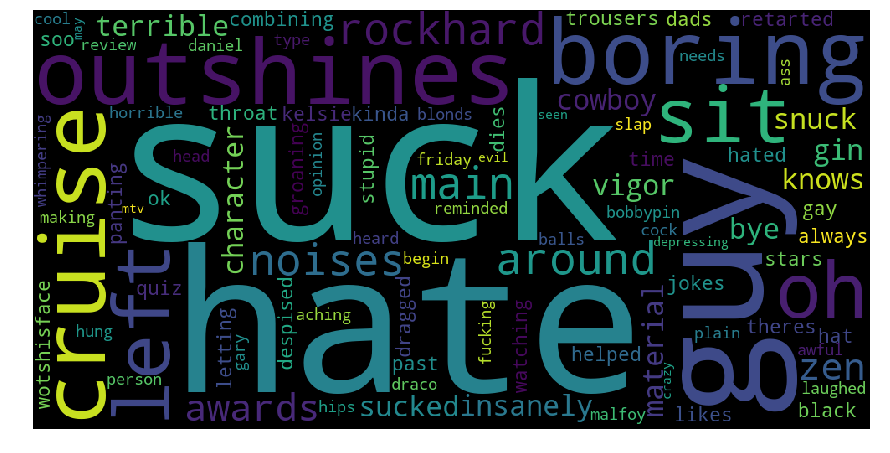

In [26]:
conjunto_negativas_filtradas_str = ' '.join(conjunto_negativas_filtradas)
wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.5).generate(conjunto_negativas_filtradas_str)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

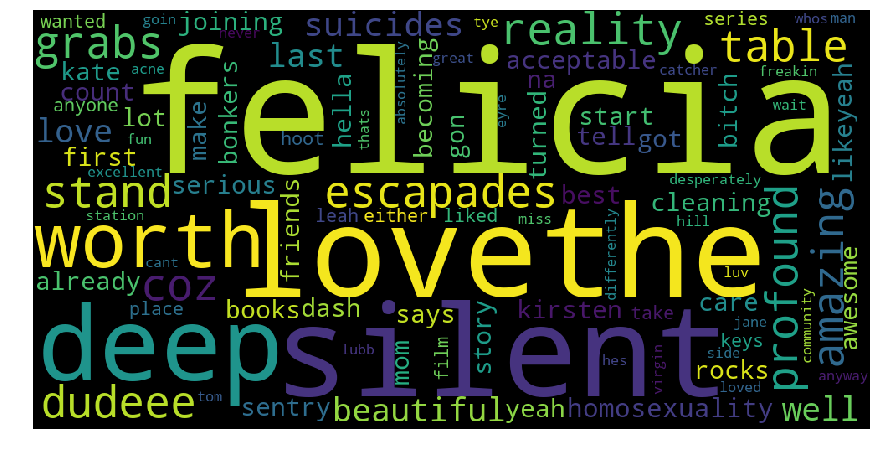

In [27]:
conjunto_positivas_filtradas_str = ' '.join(conjunto_positivas_filtradas)
wordcloud = WordCloud(width = 1000, height = 500, relative_scaling = 0.5).generate(conjunto_positivas_filtradas_str)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

###  Punto extra: histogramas

Construye histogramas para cada uno de los casos anteriores y compara si tiene sentido lo que se muestra.

In [28]:
from nltk.probability import FreqDist
fdist = FreqDist(palabras_positivas_filtradas)
fdist.most_common(20)

[('love', 1534),
 ('awesome', 1124),
 ('harry', 1085),
 ('potter', 1085),
 ('vinci', 1000),
 ('da', 999),
 ('brokeback', 999),
 ('impossible', 998),
 ('mission', 997),
 ('code', 995),
 ('mountain', 994),
 ('like', 871),
 ('``', 375),
 ('loved', 256),
 ('3', 241),
 ('movie', 228),
 ('movies', 192),
 ('much', 188),
 ('really', 186),
 ('one', 181)]

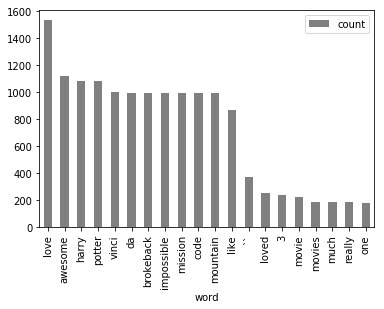

In [29]:
most_common_df = pd.DataFrame(fdist.most_common(20)).rename(columns = {0 : "word", 1 : "count"})
most_common_df.sort_values(by = "count", ascending = False).plot(x = "word", y = "count", kind="bar", color = "gray")

In [30]:
from nltk.probability import FreqDist
fdist = FreqDist(palabras_negativas_filtradas)
fdist.most_common(20)

[('potter', 1006),
 ('harry', 1003),
 ('vinci', 1001),
 ('mountain', 1000),
 ('da', 999),
 ('code', 997),
 ('brokeback', 997),
 ('sucks', 600),
 ('sucked', 595),
 ('hate', 571),
 ('movie', 555),
 ('stupid', 365),
 ('suck', 276),
 ('much', 264),
 ('really', 188),
 ('depressing', 188),
 ('horrible', 181),
 ('terrible', 174),
 ('movies', 174),
 ('fucking', 169)]

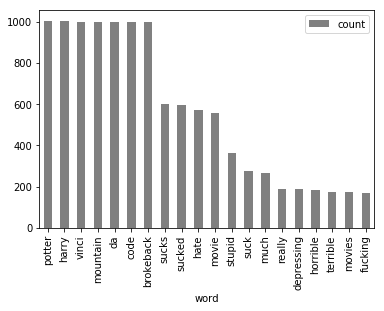

In [31]:
most_common_df = pd.DataFrame(fdist.most_common(20)).rename(columns = {0 : "word", 1 : "count"})
most_common_df.sort_values(by = "count", ascending = False).plot(x = "word", y = "count", kind="bar", color = "gray")

## Conclusiones

* ¿Qué otras técnicas habrías aplicado?
* ¿Cuál crees que sería el siguiente paso?

Como técnicas alternativas, se puede eliminar palabras muy frecuentes en el pre-procesado que carezcan de significado o que tengan semántica similar ("much"; "suck/sucks/sucked").

En el siguiente paso se podría hacer una función que encuentra semánticas similares y simplifique el dataset con una sola instancia.